In [1]:

!pip install nltk pandas yake multi_rake wordcloud

In [2]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

URL = "https://ost.ecosyste.ms/api/v1/projects?reviewed=true&per_page=3000"
FILE_TO_SAVE_AS = "projects.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [3]:
raw = pd.read_json(resp.content.decode())
print(raw.shape)
raw.head()

(1943, 29)


,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,project_url,html_url
0,20838,LISFLOOD,"A spatially distributed water resources model,...",https://github.com/ec-jrc/lisflood-code,2024-06-06 19:08:20.997000+00:00,"{'id': 37412682, 'uuid': '154518027', 'full_na...","{'login': 'ec-jrc', 'name': 'European Commissi...","[{'id': 2788725, 'name': 'lisflood-model', 'ec...","{'full_name': 'ec-jrc/lisflood-code', 'default...","{'full_name': 'ec-jrc/lisflood-code', 'html_ur...","{'total': {'ForkEvent': 44, 'CreateEvent': 145...","[copernicus, cordex, efas, environmental-model...","[{'ecosystem': 'pypi', 'filepath': 'requiremen...",12.840838,2023-09-11 14:52:15.762000+00:00,2024-06-06 19:08:21.029000+00:00,https://github.com/ec-jrc.png,Python,Climate Change,Natural Hazard and Storm,219,# Lisflood OS\n\nThis repository hosts source ...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/20838,https://ost.ecosyste.ms/projects/20838
1,20630,Intake-esm,An intake plugin for parsing an Earth System M...,https://github.com/intake/intake-esm,2024-06-06 19:08:03.632000+00:00,"{'uuid': '163683889', 'full_name': 'intake/int...","{'login': 'intake', 'name': 'Intake', 'uuid': ...","[{'id': 5298002, 'name': 'intake-esm', 'ecosys...","{'full_name': 'intake/intake-esm', 'default_br...","{'full_name': 'intake/intake-esm', 'html_url':...","{'total': {'CreateEvent': 164, 'ReleaseEvent':...","[cesm-lens, climate-datasets, cmip6, data-acce...","[{'ecosystem': 'pypi', 'filepath': 'requiremen...",18.569233,2023-09-11 14:52:14.138000+00:00,2024-06-06 19:08:03.643000+00:00,https://github.com/intake.png,Python,Climate Change,Climate Data Access and Visualization,36973,# Intake-esm\n\n- [Intake-esm](#intake-esm)\n ...,[],[https://doi.org/10.5281/zenodo.3491062],{'https://doi.org/10.5281/zenodo.3491062': None},{},0,https://ost.ecosyste.ms/api/v1/projects/20630,https://ost.ecosyste.ms/projects/20630
2,64424,Carbon Tools,A set of CO2 footprint tools to measure the im...,https://github.com/dvelasquez/carbon-tools,2024-06-06 19:08:01.447000+00:00,"{'id': 36977011, 'uuid': '303077112', 'full_na...","{'login': 'dvelasquez', 'name': 'Danilo Velasq...","[{'id': 1499555, 'name': 'bytes-to-co2', 'ecos...","{'full_name': 'dvelasquez/carbon-tools', 'defa...","{'full_name': 'dvelasquez/carbon-tools', 'html...","{'total': {'IssuesEvent': 2, 'WatchEvent': 15,...",[],"[{'ecosystem': 'npm', 'filepath': 'package.jso...",9.559447,2023-09-18 13:09:58.511000+00:00,2024-06-06 19:08:01.460000+00:00,https://github.com/dvelasquez.png,TypeScript,Consumption,Computation and Communication,134,# Carbon Tools\n[![lerna](https://img.shields....,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/64424,https://ost.ecosyste.ms/projects/64424
3,11907,SpeciesDistributionToolkit,A collection of Julia packages forming a toolk...,https://github.com/PoisotLab/SpeciesDistributi...,2024-06-06 19:07:59.806000+00:00,"{'uuid': '563142104', 'full_name': 'PoisotLab/...","{'login': 'PoisotLab', 'name': 'the Poisot lab...","[{'id': 7660847, 'name': 'Phylopic', 'ecosyste...",{'full_name': 'PoisotLab/SpeciesDistributionTo...,{'full_name': 'PoisotLab/SpeciesDistributionTo...,"{'total': {'CreateEvent': 139, 'CommitCommentE...","[bioclim, biodiversity, biogeography, chelsa, ...","[{'ecosystem': 'actions', 'filepath': '.github...",7.853216,2023-09-11 14:41:05.833000+00:00,2024-06-06 19:07:59.809000+00:00,https://github.com/PoisotLab.png,Julia,Biosphere,Biodiversity and Species Distribution,0,# SpeciesDistributionToolkit\n\n🗺️ `SpeciesDis...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/11907,https://ost.ecosyste.ms/projects/11907
4,12301,DigiVol,Harness the power of online volunteers to digi...,https://github.com/AtlasOfLivingAustralia/volu...,2024-06-06 19:07:59.397000+00:00,"{'uu

In [4]:
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 50)

#https://www.nltk.org/
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stpwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
len(raw)

1943

# 1. Goal: Reduce the list of topics below into subtopics


In [6]:
raw['category'].value_counts()

category
Biosphere                  275
Consumption                267
Climate Change             235
Energy Systems             207
Natural Resources          174
Sustainable Development    166
Hydrosphere                138
Renewable Energy           127
Atmosphere                 124
Emissions                   90
Industrial Ecology          54
Cryosphere                  51
Energy Storage              35
Name: count, dtype: int64

In [7]:
raw['sub_category'].value_counts()

sub_category
Energy Modeling and Optimization            117
Water Supply                                 80
Biodiversity and Species Distribution        79
Mobility and Transportation                  73
Buildings and Heating                        70
Agriculture and Nutrition                    66
Soil and Land                                64
Photovoltaics and Solar Energy               59
Climate Data Processing and Analysis         56
Forest Observation and Management            55
Freshwater and Hydrology                     54
Computation and Communication                53
Meteorological Observation and Forecast      52
Marine Life and Fishery                      50
Earth and Climate Modeling                   48
Emission Observation and Modeling            47
Natural Hazard and Storm                     45
Energy Distribution and Grids                43
Data Catalogs and Interfaces                 43
Climate Data Access and Visualization        43
Wind Energy                

In [8]:
df = raw[['name','description','category','sub_category','owner','readme']]
df.head()

,name,description,category,sub_category,owner,readme
0,LISFLOOD,"A spatially distributed water resources model,...",Climate Change,Natural Hazard and Storm,"{'login': 'ec-jrc', 'name': 'European Commissi...",# Lisflood OS\n\nThis repository hosts source ...
1,Intake-esm,An intake plugin for parsing an Earth System M...,Climate Change,Climate Data Access and Visualization,"{'login': 'intake', 'name': 'Intake', 'uuid': ...",# Intake-esm\n\n- [Intake-esm](#intake-esm)\n ...
2,Carbon Tools,A set of CO2 footprint tools to measure the im...,Consumption,Computation and Communication,"{'login': 'dvelasquez', 'name': 'Danilo Velasq...",# Carbon Tools\n[![lerna](https://img.shields....
3,SpeciesDistributionToolkit,A collection of Julia packages forming a toolk...,Biosphere,Biodiversity and Species Distribution,"{'login': 'PoisotLab', 'name': 'the Poisot lab...",# SpeciesDistributionToolkit\n\n🗺️ `SpeciesDis...
4,DigiVol,Harness the power of online volunteers to digi...,Biosphere,Biodiversity and Species Distribution,"{'login': 'AtlasOfLivingAustralia', 'name': 'A...",# DigiVol [![Build Status](https://travis-ci...


# 2. Sample Row

In [9]:
import re
import yake

In [10]:
# Removing words
words_black_list = ['python','pvlib','projects','affiliated','http','readthedocs','benchmarks','license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','google','documentation','please']

## Yake for keyword Extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

## Rake for keyword Extracion

In [11]:
from multi_rake import Rake

## KeyBERT for keyword extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

In [12]:
#from keybert import KeyBERT

In [13]:
#kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

# 3. Cleaning Full Dataset

In [14]:
# Fill null values with 'None'. This will allow us to concatenate the relevant text columns
df = df.fillna('None')

In [15]:
# Combine text columns
combined = df['description']

In [16]:
df['combined'] = combined
df.head()

,name,description,category,sub_category,owner,readme,combined
0,LISFLOOD,"A spatially distributed water resources model,...",Climate Change,Natural Hazard and Storm,"{'login': 'ec-jrc', 'name': 'European Commissi...",# Lisflood OS\n\nThis repository hosts source ...,"A spatially distributed water resources model,..."
1,Intake-esm,An intake plugin for parsing an Earth System M...,Climate Change,Climate Data Access and Visualization,"{'login': 'intake', 'name': 'Intake', 'uuid': ...",# Intake-esm\n\n- [Intake-esm](#intake-esm)\n ...,An intake plugin for parsing an Earth System M...
2,Carbon Tools,A set of CO2 footprint tools to measure the im...,Consumption,Computation and Communication,"{'login': 'dvelasquez', 'name': 'Danilo Velasq...",# Carbon Tools\n[![lerna](https://img.shields....,A set of CO2 footprint tools to measure the im...
3,SpeciesDistributionToolkit,A collection of Julia packages forming a toolk...,Biosphere,Biodiversity and Species Distribution,"{'login': 'PoisotLab', 'name': 'the Poisot lab...",# SpeciesDistributionToolkit\n\n🗺️ `SpeciesDis...,A collection of Julia packages forming a toolk...
4,DigiVol,Harness the power of online volunteers to digi...,Biosphere,Biodiversity and Species Distribution,"{'login': 'AtlasOfLivingAustralia', 'name': 'A...",# DigiVol [![Build Status](https://travis-ci...,Harness the power of online volunteers to digi...


In [17]:
# Words to remove from column. We will keep adding to this list the more words we find that are irrelavent
words_black_list_small = ['python','projects','affiliated','http','readthedocs','benchmarks',
                    'license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','users','using'
                    'google','documentation','please','github','data','model','install','code',
                    'package','badge','project']

In [18]:
# More words to remove
words_black_list_large = ['python','tool','based','pvlib','projects','affiliated','http','readthedocs','benchmarks','aims','high','series','functions','large','calculate','applications','flow','easy','contains','state','collection','real','flexsible','program','implementation','evaluate','track','engineering',
                    'license','matlab','user','guide','html','https','open','source','journal','various','written','toolbox','working','design','related','level','deep','standard','within','applications','methods','toolkits','multi','network','coupled','platform','application','developed','possible',
                    'latest','release','build','publications','conda','installed','users','using','julia','different','toolkit','toolkit','provide','focus','smart','simple','enables','sources','client','advanced','digital','across','suite','domain','estimate','evaluation','measurements','statistical',
                    'google','documentation','please','github','data','model','install','code','numerical','simulation','algorithms','driven','interactive','helps', 'package','resolution','visualization','images','explore','develop','analysis','distributed','calculations','global','control','accessible',
                    'package','badge','project','version','file','view','system','master','used','also','providing','enable','multiple','point','image','process','including','components','computer','easily','built','range','line','calculations','term','uses','faciliate','online','study','evaluate',
                    'repository','example','docs','files','information','models','software','available','work','making','visualize','format','load','usage','module','apis','automated','temporal','curated','variable','best','variables','websites','sets','near','worldwide','automatic','problems','custom',
                    'zenodo','command','modis','pull','request','pctl','theoj','brodiepearson','blob','getting','order','fast','daily','makes','domaine','around','processes','associated','long','type','clean','optimal','many','awesome','extract','three','variety','useful','inventory','allowing',
                    'started','machine','learning','make','sure','pypi','ipcc','main','scholor','colorado','codecov','individual','researchers','historical','metadata','supporting','finite','analyze','databases','chemical','initiative','technologies','collect','hourly','given','solver','space',
                    'none','jupyter','notebook','united','states','docker','anaconda','forge','datasets','false','would','reference','tracking','identify','general','techniques','scripts','world','libraries','estimating','neutral','response','algorithm','ground','retrieving','retrieve','quantitative',
                    'like','gustavoirgang','google','collab','sciencedirect','yaml','downloads','actions','workflows', 'understanding','international','compute','gridded','studies','single','calculates','exchange','potential','robust','dimensional','reporting','development','simulations','flexsible',
                    'media','icon','joss','papers','legend','description','jobs','download','input','output','latitude','longitude','analyse','measurement','directly','official','sheet','classifications','find','features','computational','operations','grids','includes','text','standardized','dedicated','easier','purpose',
                    'unit','tests','cran','nbsp','colab','check','plot','ncss','contributing','installation', 'instructions','fortran','complex','simulating','component','access','bottom','flexible','search','agent','results','needed','creating','friendly','basic','linear','assess','wrapper','defined','wide','method',
                    'wiki','wikipedia','feel','free','name','list','issues','start','examples','index','dataset','branch','create','high','performance','management','scale','website','codes','programs','downnloading','utility','imagery','events','websites','share','solutions','published',
                    'enabling','specification','semantic','inputs','query','vertical','estimates','freely','several','object','specific','parameters','discover','accelerate','calculating','functionality','cover','testing','operation','reinforcement','form','perform',
                    'better','towards','layer','evaluating','speed','comprehensive','cells','energyplus','derived','interactions','layers','emis','emerging','apps','hardware','past','read','android','utilities','nrel','better','repositories','simulate','oriented','european','tastes',
                    'availability','part','language','extent','europe','german','germany','quickly','approach','total','programming','short','visualise','produced','intended','quantifying','availability','plugin',
                    'server','noaa','existing','volume','primary','canada','post','core','carlo','platforms','gtfs','visualizations','chain','independent','benchmark','modules','change','changes',
                    'probabilistic','criteria','benchmark','scaleable','scales','mission','empirical','inventories','parallel','consistent','organization','countries','collaboration','agency','devices','sensor','sensors','goals','neutral','area',
                    'administration','meant','toolset','mixed','store','attrributes','unidata','improve','netcdf','supports','complete','levels','promote','levels','complete','collections','nasa','summary','conditions','effects',
                    'options','usgs','australian','commercial','monte','capable','neutral','save','generate','manage','factors','modelica','rapid','boundary','relevant','simulates','powerful','stakeholders','dynamics',
                    'containing','aware','operators','reading','notebooks','calculator','visualizing','statistics','direction','ensemble','automate','edge','xarray','integrating','along',
                    'routing','converts','benchmarking','specified','modern','offers','downloading','detect','apply','role','commonly','specifically','generalized','enhanced',
                    'external','generated','spred','generic','organization','elevation','stack','equivalent','lagrangian','generalized','generalized','report','things','organizations','java','display',
                    'next','analyzing','structured','practices','combines','widely','structure','qgis','operational','assessing','generates','characteristics','institute','estimation','determine','practitioners','benefit','particle','scale','technical','setup',
                    'modeling','national','quality','modelling','service','modular','neutral','small','australia','cell','british','columbia','generating','analyses','sharing','notebook','experiments','portal','types','quantify','artificial','focused','protocol','highly','equations','first','tasks','arduino','suitable','automation','compare','comparison',
                    'library','following','test','running','import','database','access','packages','directory','need','tools','simulation','time','framework','systems','designed','community','interface','optimization','allows','support','grid','research','processing','help','provides']

In [19]:
len(words_black_list)

25

In [20]:
# Create new column called "cleaned_text" and apply different cleaning methods
df['cleaned_text'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_large)) # Remove words from blacklist
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords


In [21]:
df['cleaned_text']

0       spatially water resources joint centre commiss...
1             intake parsing earth catalog loading assets
2                           footprint measure impact ship
3                       forming deal species distribution
4       harness power volunteers digitise biodiversity...
                              ...                        
1938    microgrid utilizes renewable energy power enha...
1939    nitrogen oxide emissions contrail formation av...
1940    energy signatures buildings signatures buildin...
1941           legacy dragonfly climate urban heat island
1942    accounts contributed oceanic atmospheric staff...
Name: cleaned_text, Length: 1943, dtype: object

# 4. Unique Words

* Let's get a look at the most common words in our cleaned_text column

In [22]:
from collections import Counter

# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df['cleaned_text']]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [23]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(400)
word_freq

[('energy', 285),
 ('climate', 219),
 ('water', 112),
 ('power', 99),
 ('weather', 80),
 ('earth', 79),
 ('carbon', 79),
 ('environmental', 78),
 ('emissions', 68),
 ('wind', 64),
 ('ocean', 57),
 ('atmospheric', 54),
 ('soil', 52),
 ('electricity', 50),
 ('building', 49),
 ('solar', 48),
 ('land', 47),
 ('assessment', 47),
 ('surface', 46),
 ('science', 43),
 ('species', 41),
 ('forest', 41),
 ('consumption', 36),
 ('integrated', 36),
 ('environment', 33),
 ('biodiversity', 32),
 ('meteorological', 31),
 ('monitoring', 30),
 ('impact', 29),
 ('marine', 29),
 ('forecasting', 29),
 ('transport', 29),
 ('satellite', 29),
 ('generation', 28),
 ('plants', 27),
 ('plant', 27),
 ('well', 27),
 ('tree', 26),
 ('greenhouse', 25),
 ('services', 25),
 ('common', 25),
 ('battery', 25),
 ('atmosphere', 25),
 ('distribution', 24),
 ('ecosystem', 24),
 ('cycle', 24),
 ('impacts', 24),
 ('renewable', 23),
 ('public', 23),
 ('scientific', 23),
 ('spatial', 23),
 ('vegetation', 23),
 ('storage', 23),
 

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

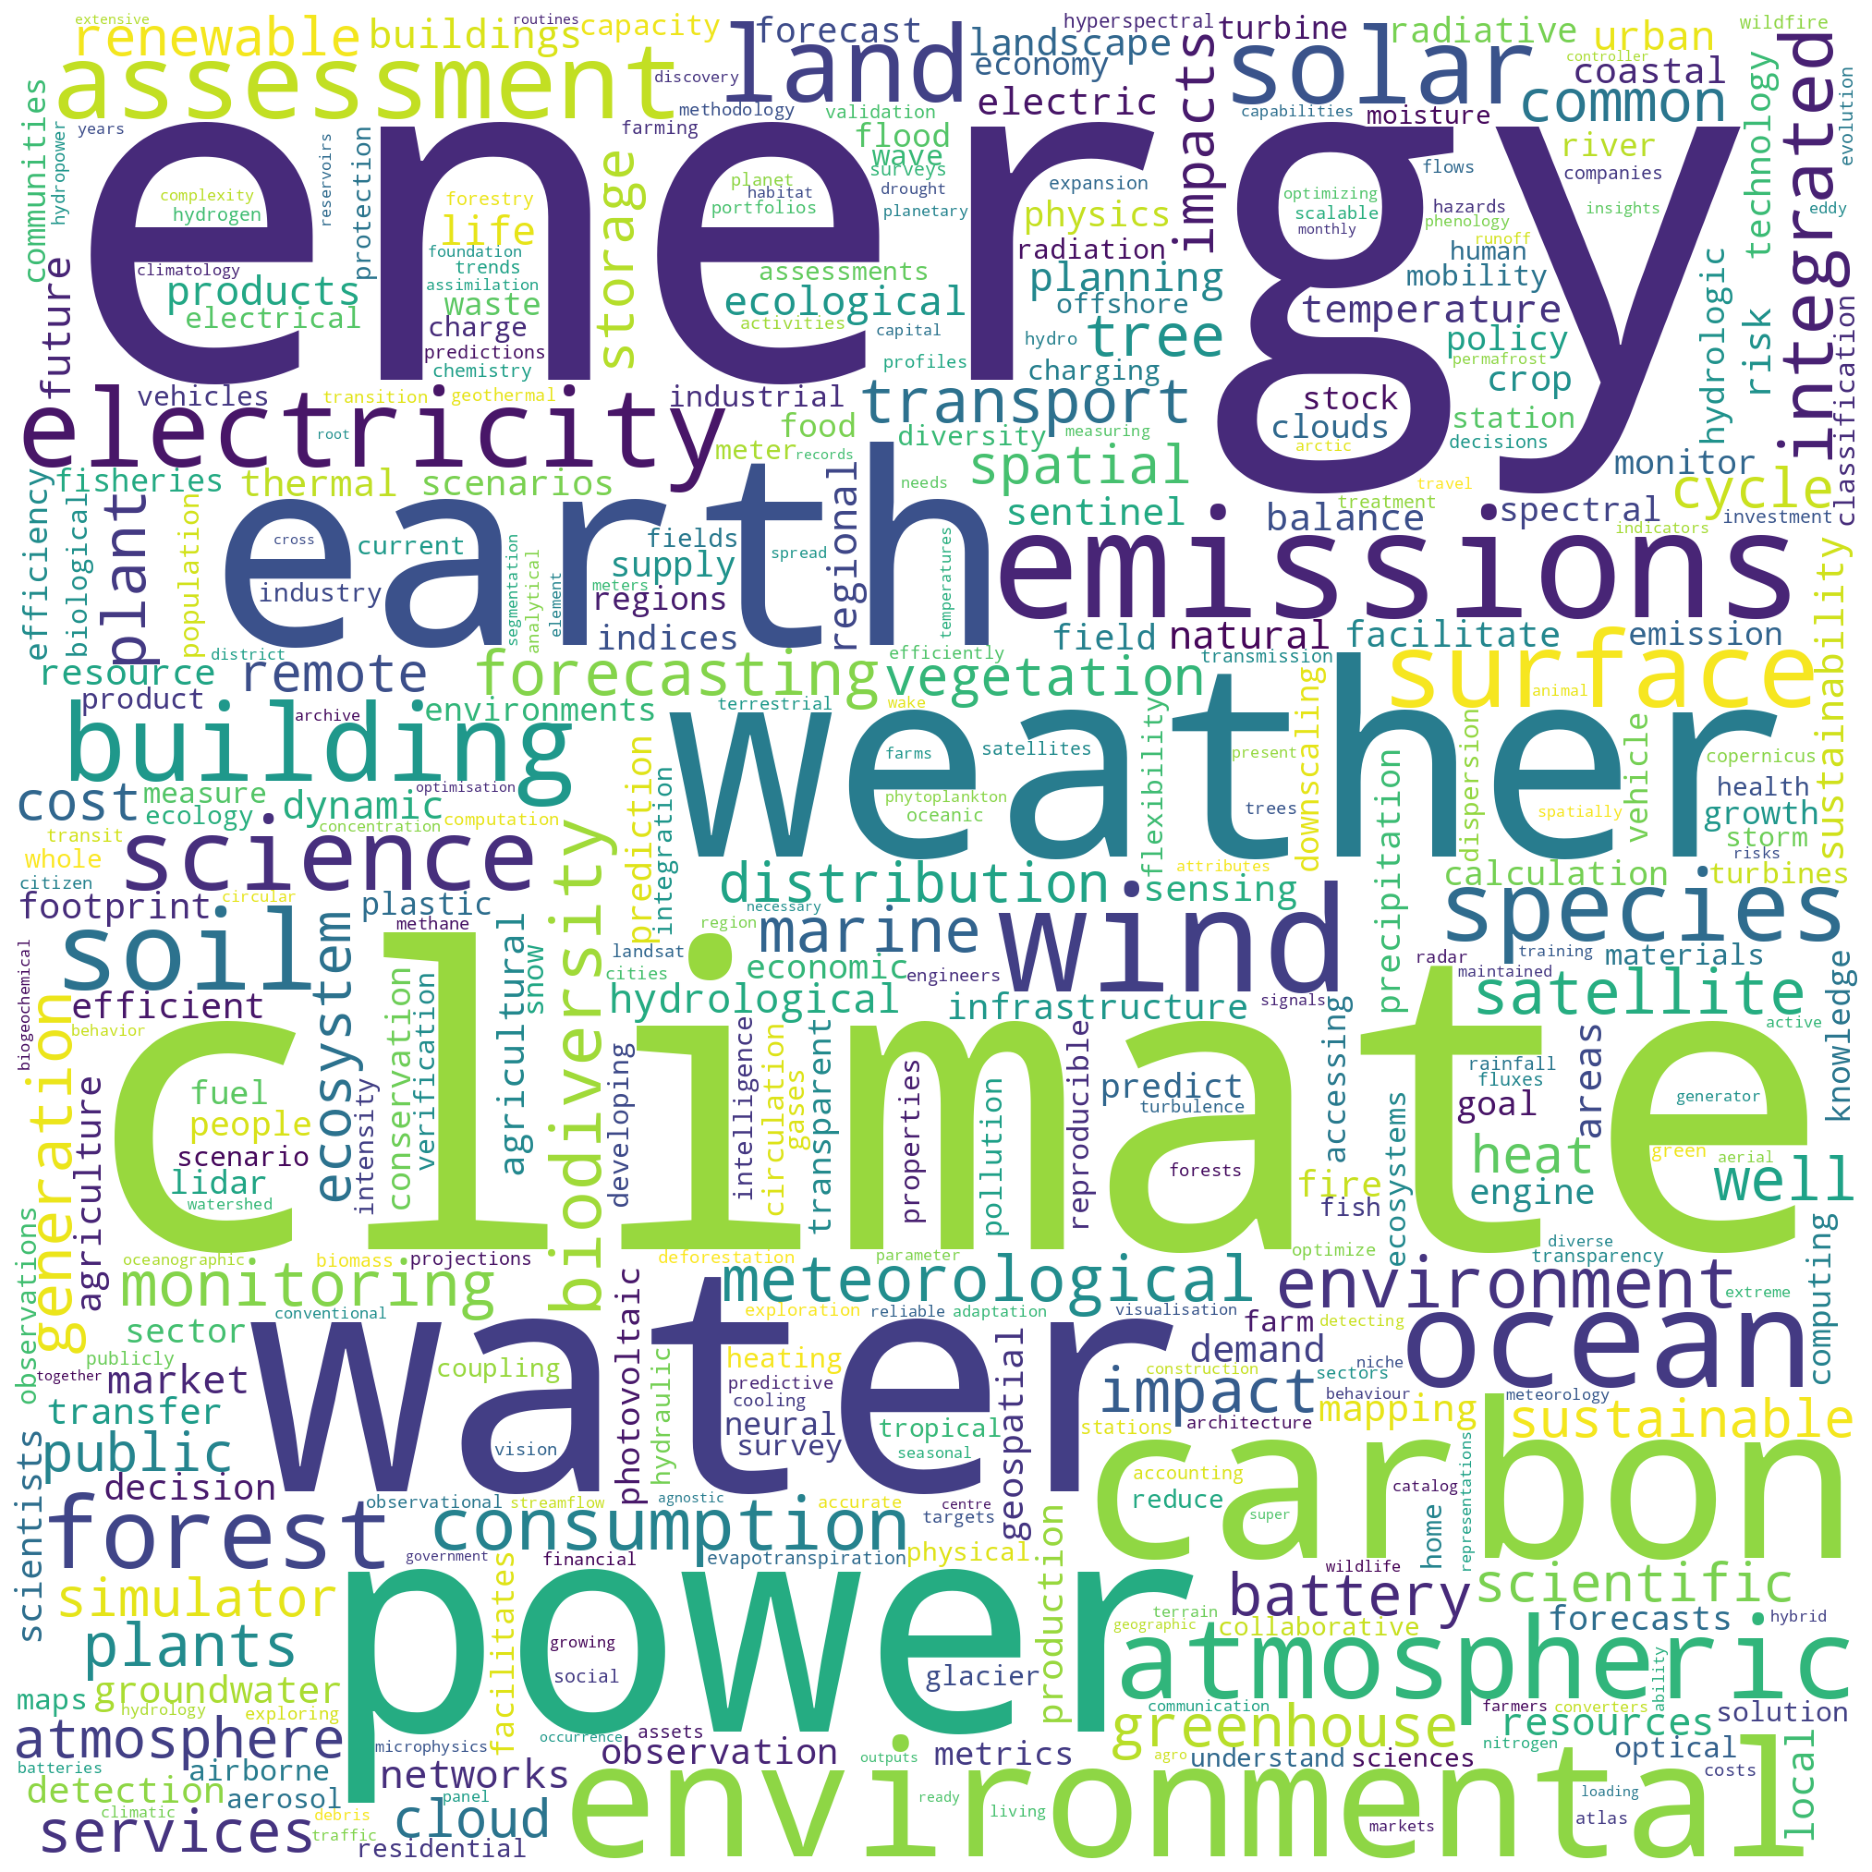

In [25]:
wc = WordCloud(background_color="white", max_words=500,width=2000,height=2000,relative_scaling=0.5)
wc.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# 5. Unique Bigrams and Trigrams

* We should also look at the most common bigrams and trigrams

In [26]:
df['cleaned_text'].str.split()

0       [spatially, water, resources, joint, centre, c...
1       [intake, parsing, earth, catalog, loading, ass...
2                      [footprint, measure, impact, ship]
3                  [forming, deal, species, distribution]
4       [harness, power, volunteers, digitise, biodive...
                              ...                        
1938    [microgrid, utilizes, renewable, energy, power...
1939    [nitrogen, oxide, emissions, contrail, formati...
1940    [energy, signatures, buildings, signatures, bu...
1941    [legacy, dragonfly, climate, urban, heat, island]
1942    [accounts, contributed, oceanic, atmospheric, ...
Name: cleaned_text, Length: 1943, dtype: object

In [27]:
len(words)

NameError: name 'words' is not defined

In [ ]:
df['cleaned_text_bigrams'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_small)) # Remove words from blacklist
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords

In [ ]:
# Create list of words in the order in which they orignally appear
words = list(df['cleaned_text_bigrams'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [ ]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts()).to_frame()

In [ ]:
type(bigrams)

In [ ]:
bigrams.head(300)

In [ ]:
bigrams.reset_index(inplace=True)

In [ ]:
bigrams.head(400)

In [ ]:
# This are the bigrams manually filtered to match to the OpenSustain.tech database
bigrams_ost = ["climate change","energy systems","power system","earth system","energy system","energy consumption","power systems","remote sensing","renewable energy","water quality","life cycle","radiative transfer","weather climate","integrated assessment","wind energy","earth science","carbon footprint","surface water","sustainable development","species distriibution","power plants","wind turbine", "electric vehicle","wind farm","carbon emiśsions","greenhouse emissions","greenhouse gases","electricity market","land surface","numerical weather","wind turbine", "energy storage","development goals","solar cells", "soil water", "energy resources", "solar energy","energy managment", "carbon intensity", "water balance", "soil moisture", "climate science", "environmental impacts", "climate models", "carbon cycle", "offshore wind", "energy sector", "energy information", "distributed energy", "impact climate", "weather prediction", "urban energy", "power consumption", "citizen science", "decision making", "atmospheric science", "water resources", "land cover", "circular economy", "biodivercity information", "global climate", "forest management", "hydrological models", "large eddy", "energy market", "forest carbon", "atmospheric oceanic", "solar radiation", "stock assessment","general circulation", "battery models", "weather forecasts", "climate scenarios", "environmental economic", "climate policy", "climate analysis", "climate carbon", "electricity generation", "energy policy", "power grid", "electricity system", "fisheries stock", "global weather", "cloud microphysics","storage systems","wind speed", "wind farms","public transport","solar thermal", "statisical downscaling", "future energy", "energy modeling", "energy generation", "environment climate","tree crown","climate downscaling","solar power","wildland fire","climate sciences","fossil fuel","global scale","impact assessment","energy resource","carbon dioxide","carbon nitrogen","ocean state","emissions energy","soil properties","shallow water","smart grid","water treatment","future climate","climate impacts","level rise","global soil","niche models","land use","costal ocean","heating cooling", "ecological niche", "energy usage", "weather radar","water flow","wave energy","heat pump","district heating","flood inundation","protected areas","smart meter","demand flexibility"," groundwater surface","bottom trawl","tropical cyclone","water management","water carbon","organic carbon","atmospheric composition","marine debris","fire spread","electrial grid","social environmental","atmospheric models","global change","plastic pollution","change analysis"]


In [ ]:
bigrams_ost

In [ ]:
# Most frequent trigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:100]

#6. Further Work

* Further reduce the number of unique keywords by removing irrelevant words
* Create a list of topics/subtopics that we want
* Define features (words, bigrams, trigrams)
* cosine similarity to get similar projects
